In [ ]:
https://www.ssb.no/valg/statistikker/stortingsvalg

https://www.ssb.no/eksport/tabell.csv?key=326620

In [4]:
data = !curl https://www.ssb.no/eksport/tabell.csv?key=326620

In [5]:
for line in data:
    print(line)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1009    0  1009    0     0   1296      0 --:--:-- --:--:-- --:--:--  1295
﻿;2009;2013;2017;2017 i prosent;
Godkjente stemmer;Godkjente stemmer;Godkjente stemmer;Godkjente stemmer;
Godkjente stemmer totalt;2682904;2836029;2926836;100,0;
Arbeiderpartiet;949049;874769;800947;27,4;
Fremskrittspartiet;614717;463560;444681;15,2;
Høyre;462458;760232;732895;25,0;
Kristelig Folkeparti;148748;158475;122797;4,2;
Senterpartiet;165006;155357;302017;10,3;
Sosialistisk Venstreparti;166361;116021;176222;6,0;
Venstre;104144;148275;127910;4,4;
Miljøpartiet de Grønne;9286;79152;94788;3,2;
Rødt;36219;30751;70522;2,4;
Norges Kommunistiske Parti;697;611;309;0,0;
Pensjonistpartiet;11900;11865

In [6]:
linje = data[12]
print(linje)
print(linje.split(";"))
print(linje.rstrip(";"))
print(linje.rstrip(";").split(";"))
print(linje.rstrip(";").replace("," , "."))
print(linje.rstrip(";").replace("," , ".").split(";"))

Kristelig Folkeparti;148748;158475;122797;4,2;
['Kristelig Folkeparti', '148748', '158475', '122797', '4,2', '']
Kristelig Folkeparti;148748;158475;122797;4,2
['Kristelig Folkeparti', '148748', '158475', '122797', '4,2']
Kristelig Folkeparti;148748;158475;122797;4.2
['Kristelig Folkeparti', '148748', '158475', '122797', '4.2']


In [7]:
#print(data[6:])
#print(data[8:])
#print(data[9:])

In [18]:
partier = []
stemmer2009 = []
stemmer2013 = []
stemmer2017 = []
stemmer2017iprosent = []

for linje in data[9:18]:
    linjeliste = linje.rstrip(";").replace("," , ".").split(";")
    partier.append(linjeliste[0])
    stemmer2009.append(int(linjeliste[1]))
    stemmer2013.append(int(linjeliste[2]))
    stemmer2017.append(int(linjeliste[3]))
    stemmer2017iprosent.append(float(linjeliste[4]))
    
print(partier)
print(stemmer2009)
print(stemmer2013)
print(stemmer2017)
print(stemmer2017iprosent)

['Arbeiderpartiet', 'Fremskrittspartiet', 'Høyre', 'Kristelig Folkeparti', 'Senterpartiet', 'Sosialistisk Venstreparti', 'Venstre', 'Miljøpartiet de Grønne', 'Rødt']
[949049, 614717, 462458, 148748, 165006, 166361, 104144, 9286, 36219]
[874769, 463560, 760232, 158475, 155357, 116021, 148275, 79152, 30751]
[800947, 444681, 732895, 122797, 302017, 176222, 127910, 94788, 70522]
[27.4, 15.2, 25.0, 4.2, 10.3, 6.0, 4.4, 3.2, 2.4]


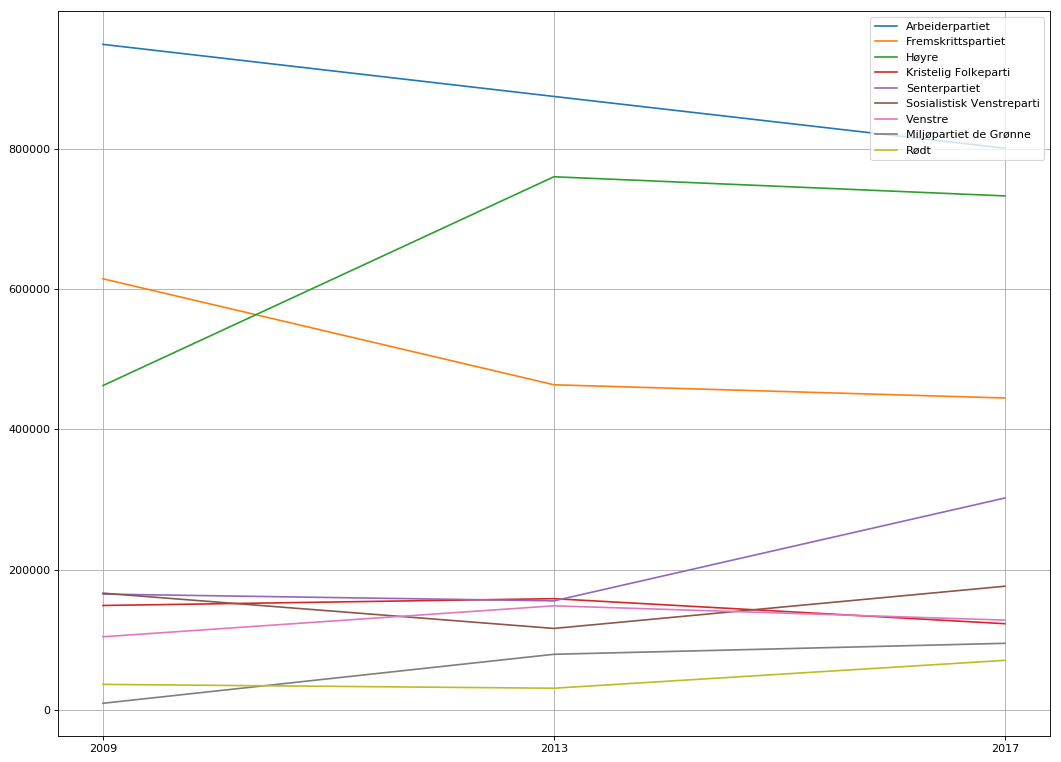

In [19]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

x = ['2009', '2013', '2017']

for i in range(len(partier)):
    y = [stemmer2009[i], stemmer2013[i], stemmer2017[i]]
    plt.plot(x, y, label=partier[i])

plt.legend(loc='best')
plt.grid()
plt.show()

In [12]:
print(data[8])
print(data[8].rstrip(";").replace("," , ".").split(";"))
datanums = data[8].rstrip(";").replace("," , ".").split(";")

Godkjente stemmer totalt;2682904;2836029;2926836;100,0;
['Godkjente stemmer totalt', '2682904', '2836029', '2926836', '100.0']


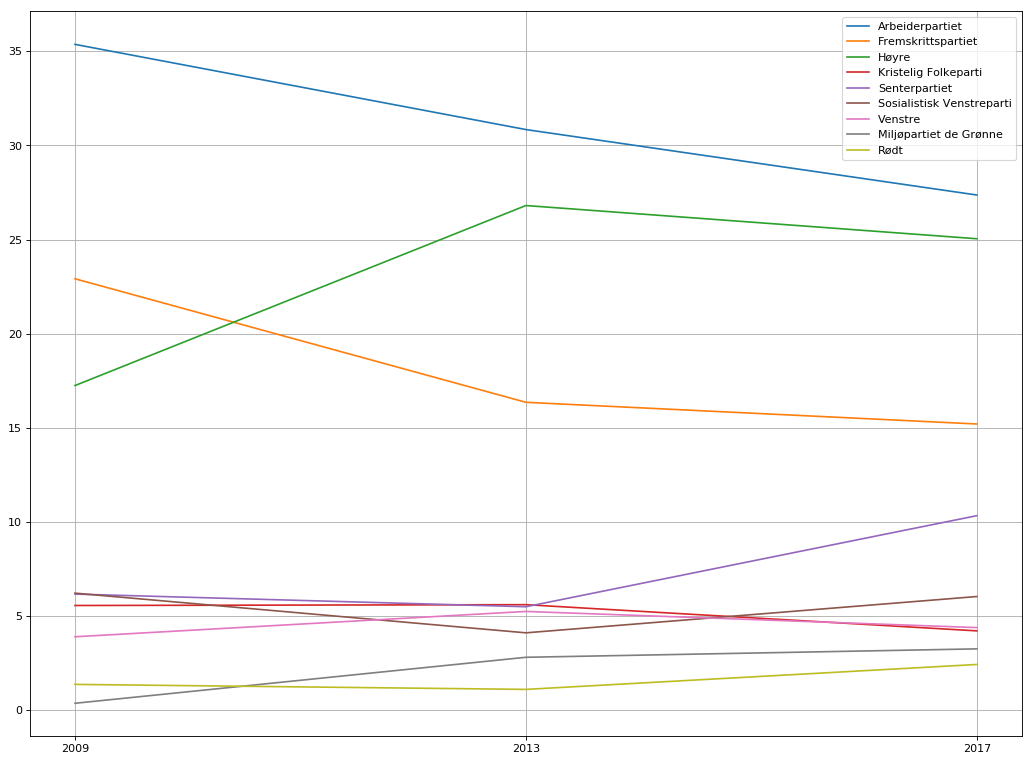

In [20]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

x = ['2009', '2013', '2017']

for i in range(len(partier)):
    y = [stemmer2009[i]/int(datanums[1])*100, stemmer2013[i]/int(datanums[2])*100, stemmer2017[i]/int(datanums[3])*100]
    plt.plot(x, y, label=partier[i])

plt.legend(loc='best')
plt.grid()
plt.show()

In [14]:
estimater2021 = []

for i in range(len(partier)):
    estimater2021.append(stemmer2017[i] + int((stemmer2017[i]-stemmer2009[i])/2))
    

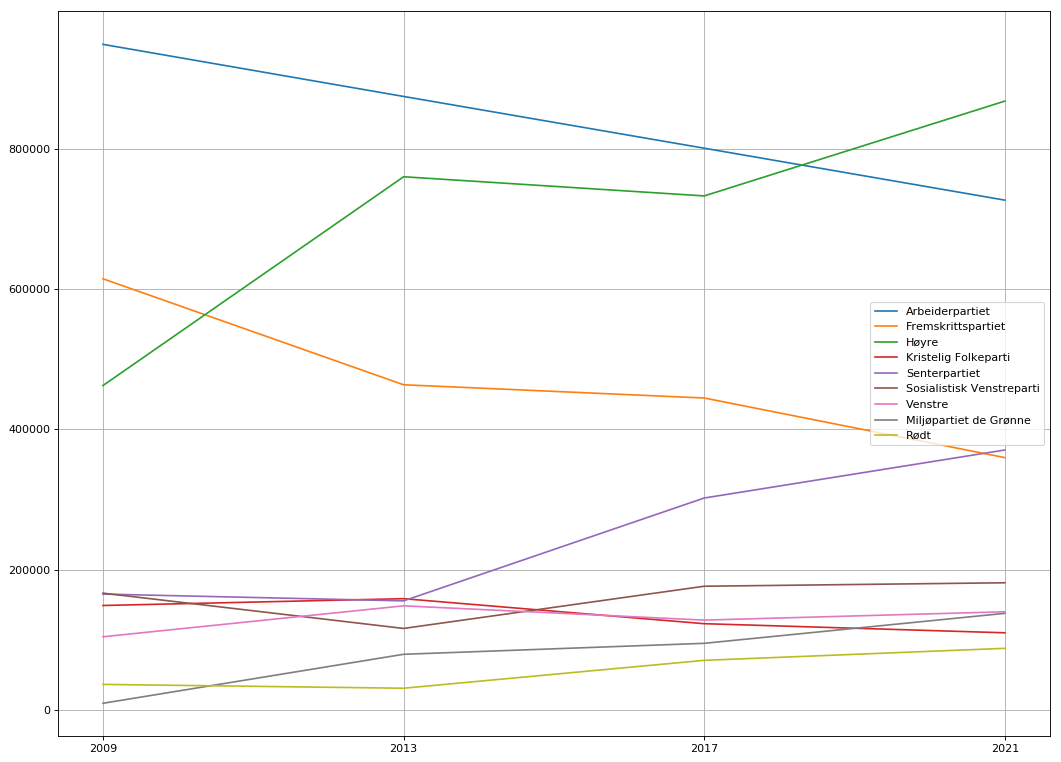

In [21]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

x = ['2009', '2013', '2017', '2021']

for i in range(len(partier)):
    y = [stemmer2009[i], stemmer2013[i], stemmer2017[i], estimater2021[i]]
    plt.plot(x, y, label=partier[i])

plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
import csv
with open('stemmetall.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=';')
    for i in range(len(partier)):
        writer.writerow([partier[i], stemmer2009[i], stemmer2013[i], stemmer2017[i], estimater2021[i]])